In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import get_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
import glob
import pandas as pd
import cvlib as cv
import time

from util import *

In [2]:
# checking if GPU is being used for training
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("GPU is not detected")

Default GPU Device:/device:GPU:0


In [3]:
# hyperparameters 
epochs = 30
lr = 1e-3
batch_size = 32
img_dims = (128,128,3)

In [4]:
# should be disable when testing on other models (image dimension maybe different)
enable_load_saved = True;
saved_file = "precessed_data_{}x{}".format(img_dims[0], img_dims[1])
    
data = []
labels = []
start = time.time()
if (enable_load_saved and os.path.isfile(saved_file+".h5")):
    print("loading from h5 file")
    data, labels = load_h5_data(saved_file+".h5")
else :
    print("please generate the h5 data file from main notebook")
end = time.time()
print("time taken "+time_convert(end-start))

loading from h5 file
The keys are:  <KeysViewHDF5 ['image', 'label']>
The shape of x_field (10222, 128, 128, 3)
The shape of y_field (10222, 1)
time taken 5s


In [5]:
# split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)
trainY = to_categorical(trainY, num_classes=120)
testY = to_categorical(testY, num_classes=120)

In [6]:
# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [7]:
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_rate = tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)

# Explore on common pre-trained models 
https://keras.io/api/applications/

In [8]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.applications import ResNet50, ResNet101, ResNet152, ResNet50V2, ResNet101V2, ResNet152V2
from tensorflow.keras.applications import InceptionV3, InceptionResNetV2
from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.applications import NASNetMobile, NASNetLarge


# define dictionary of evaluating models
models = {
    # change here to evaluate other models
    "DenseNet121": DenseNet121(include_top=False, weights='imagenet', input_shape=img_dims),
    "DenseNet169": DenseNet169(include_top=False, weights='imagenet', input_shape=img_dims),
    "DenseNet201": DenseNet201(include_top=False, weights='imagenet', input_shape=img_dims),
}

C:\Users\chiayu\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
255/255 [==============================] - 114s 316ms/step - loss: 5.1512 - accuracy: 0.0728 - val_loss: 2.9016 - val_accuracy: 0.2792
Epoch 2/30

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
255/255 [==============================] - 21s 82ms/step - loss: 2.8691 - accuracy: 0.2993 - val_loss: 2.5742 - val_accuracy: 0.3540
Epoch 3/30

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
255/255 [==============================] - 21s 83ms/step - loss: 2.3961 - accuracy: 0.3823 - val_loss: 2.4928 - val_accuracy: 0.3653
Epoch 4/30

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
255/255 [==============================] - 21s 83ms/step - loss: 2.1545 - accuracy: 0.4416 - val_loss: 2.4579 - val_accuracy: 0.3971
Epoch 5/30

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0010000

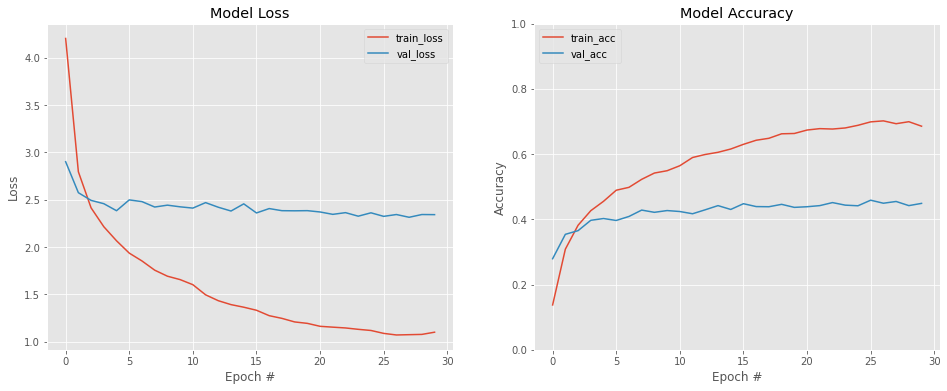

C:\Users\chiayu\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
255/255 [==============================] - 72s 201ms/step - loss: 4.7720 - accuracy: 0.1123 - val_loss: 2.5758 - val_accuracy: 0.3516
Epoch 2/30

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
255/255 [==============================] - 22s 86ms/step - loss: 2.4862 - accuracy: 0.3704 - val_loss: 2.5100 - val_accuracy: 0.3961
Epoch 3/30

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
255/255 [==============================] - 22s 87ms/step - loss: 2.0977 - accuracy: 0.4521 - val_loss: 2.3755 - val_accuracy: 0.4200
Epoch 4/30

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
255/255 [==============================] - 22s 85ms/step - loss: 1.8731 - accuracy: 0.5045 - val_loss: 2.4664 - val_accuracy: 0.4176
Epoch 5/30

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00100000

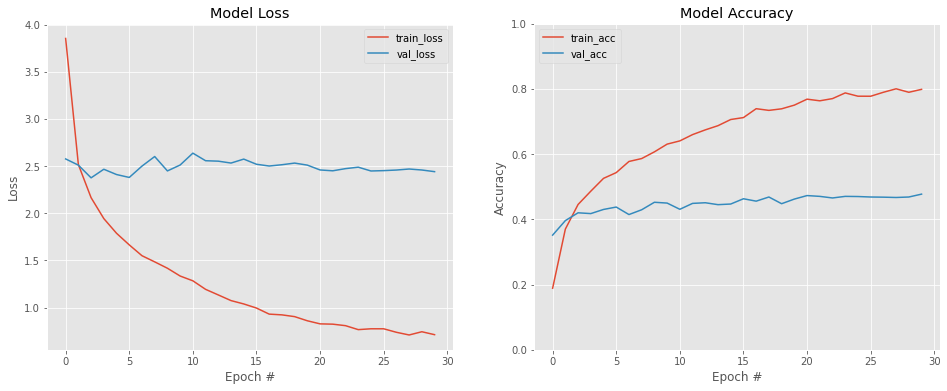

C:\Users\chiayu\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
255/255 [==============================] - 69s 190ms/step - loss: 4.5074 - accuracy: 0.1183 - val_loss: 2.6086 - val_accuracy: 0.3472
Epoch 2/30

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
255/255 [==============================] - 23s 90ms/step - loss: 2.4572 - accuracy: 0.3784 - val_loss: 2.4364 - val_accuracy: 0.3912
Epoch 3/30

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
255/255 [==============================] - 23s 90ms/step - loss: 2.0460 - accuracy: 0.4637 - val_loss: 2.3591 - val_accuracy: 0.4279
Epoch 4/30

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
255/255 [==============================] - 23s 91ms/step - loss: 1.8075 - accuracy: 0.5237 - val_loss: 2.4446 - val_accuracy: 0.4210
Epoch 5/30

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00100000

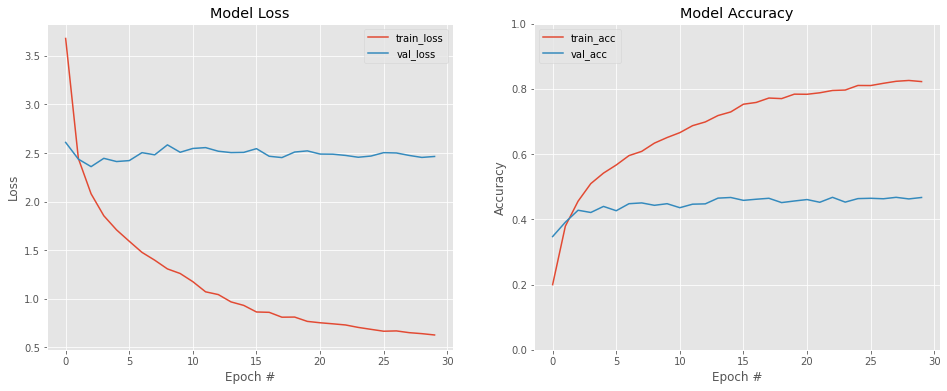

In [9]:
for model_name in models:
    # retrieve base model
    base = models[model_name]
    
    # freeze pre-trained weight
    base.trainable = False

    # rebuild output layer
    x = base.output
    x = GlobalAveragePooling2D()(x)
    head = Dense(120, activation='softmax')(x)
    model = Model(inputs=base.input, outputs=head)

    # Compiling the model
    model.compile(optimizer=Adam(lr=lr), 
                  loss = 'categorical_crossentropy', 
                  metrics=['accuracy'])

    # start training models
    start = time.time()
    H=model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                            validation_data=(testX,testY),
                            steps_per_epoch=len(trainX) // batch_size,
                            epochs=epochs, verbose=1,
                            callbacks=[lr_rate]
                         )
    end = time.time()
    print("training time: "+time_convert(end-start))
    
    # plot model performance
    plot_model_history(H, saving_name="{}_freezed".format(model_name))